In [3]:
import pandas as pd
import sanity_checks_methods
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import ML_algorithms
import scipy.stats as st

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()
df_to_test.dropna(axis=0,inplace=True)
df_to_test = df_to_test[df_to_test['sex'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

Inserting 10% of null values in every feature separately

ADDING 10% TO FEATURE: sex
--------------------------------------

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------

Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3451
           1       0.97      1.00      0.98      3548

    accuracy                           0.98      6999
   macro avg       0.98      0.98      0.98      6999
weighted avg       0.98      0.98      0.98      6999


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1548
           1       0.94      0.99      0.97      1452

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000


Migliori Parametri: {'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20, 'criterion

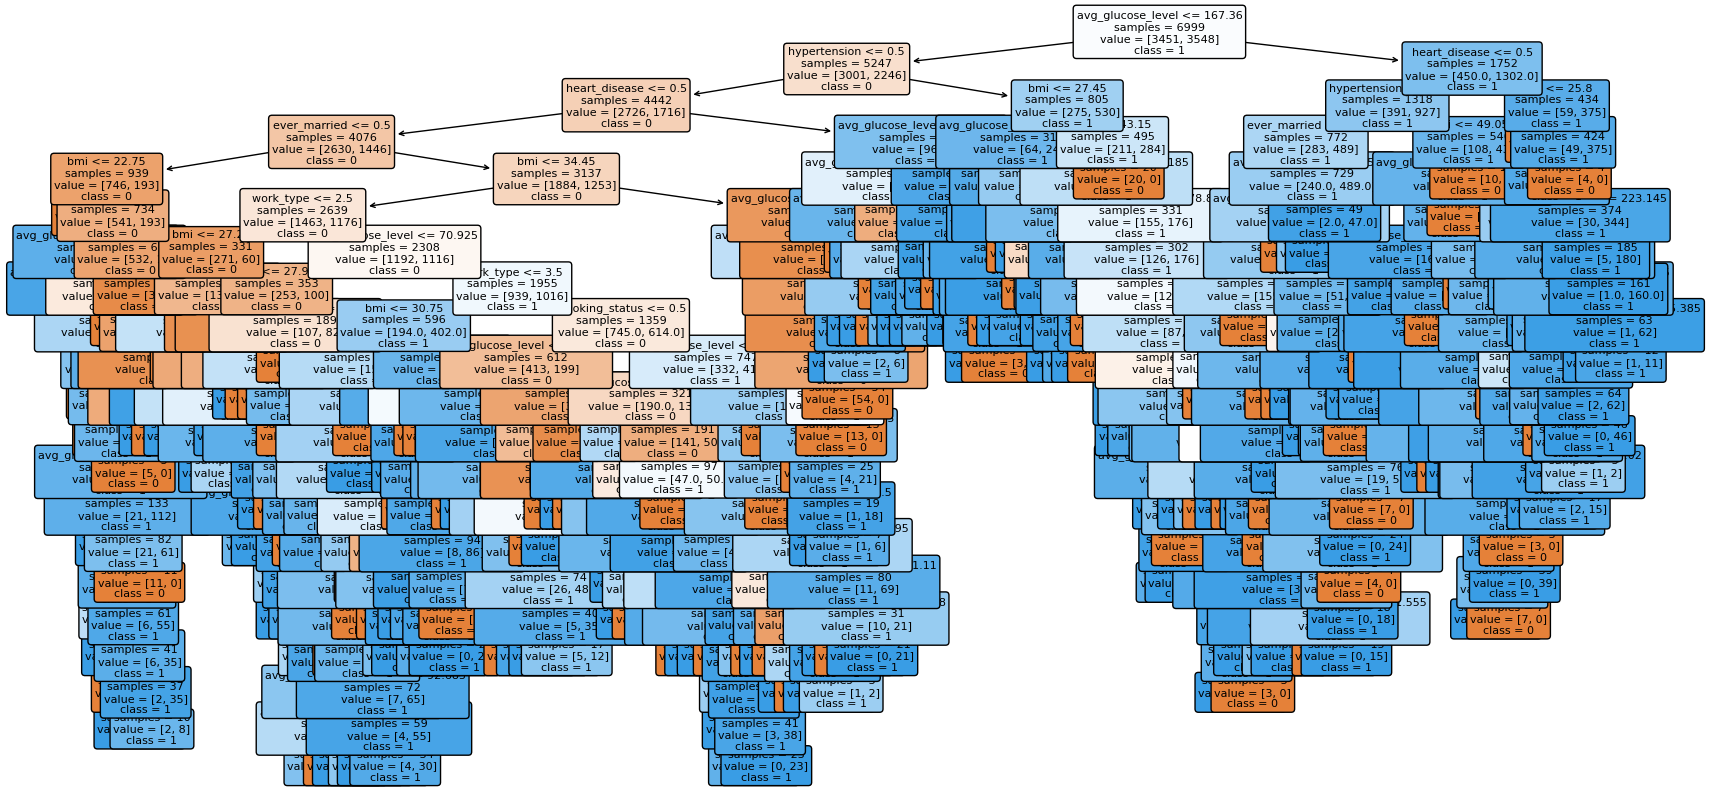

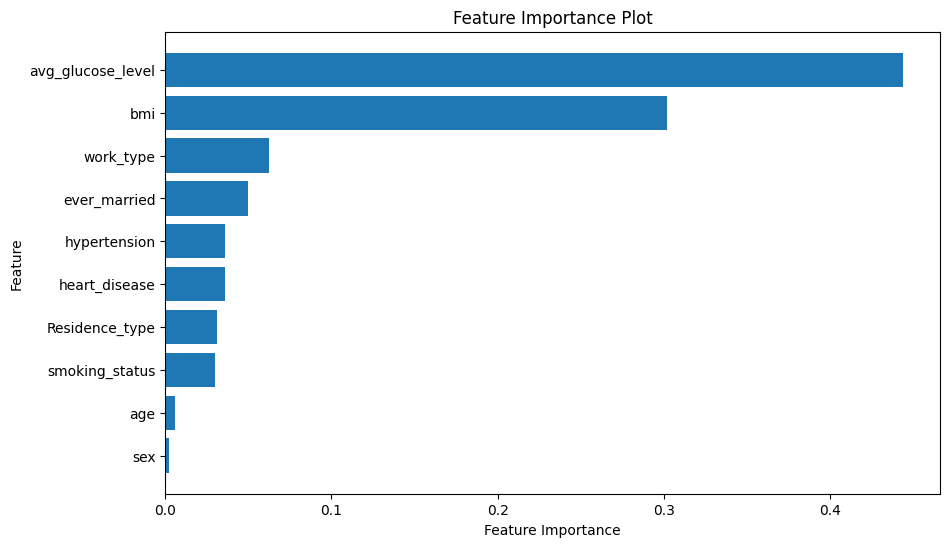

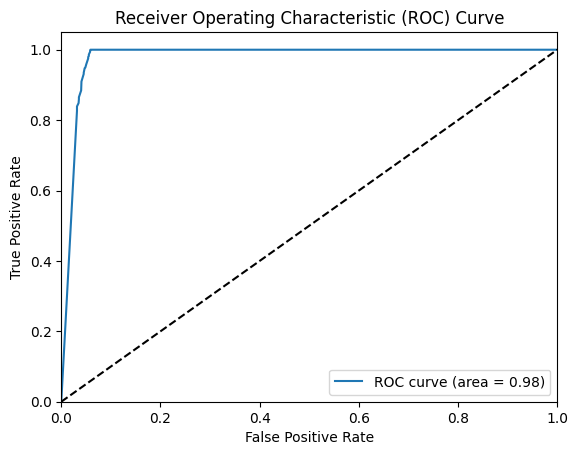

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9793848901274906
Accuracy for each fold: [0.9485714285714286, 0.9628571428571429, 0.9485714285714286, 0.9428571428571428, 0.95, 0.9514285714285714, 0.9414285714285714, 0.9671428571428572, 0.9728571428571429, 0.9542203147353362]
Mean accuracy: 0.9539934600449621
95% confidence interval: (0.946564690212432, 0.9614222298774923)


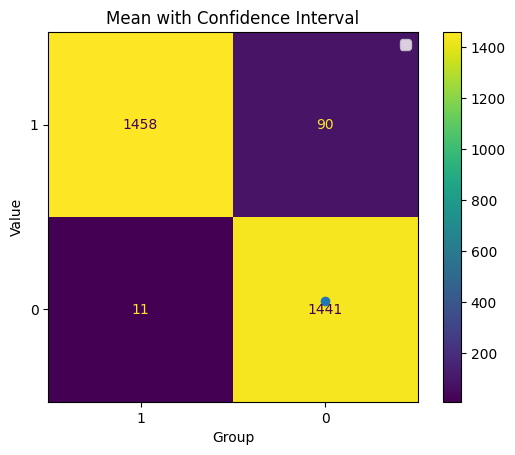


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 24.99742078781128
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 415, 'min_samples_leaf': 6}
Best score on training data:  1.0
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3451
           1       1.00      1.00      1.00      3548

    accuracy                           1.00      6999
   macro avg       1.00      1.00      1.00      6999
weighted avg       1.00      1.00      1.00      6999

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1548
           1       0.98      1.00      0.99      1452

    accuracy                           0.99      3000
   macro avg       0.99      0.99    

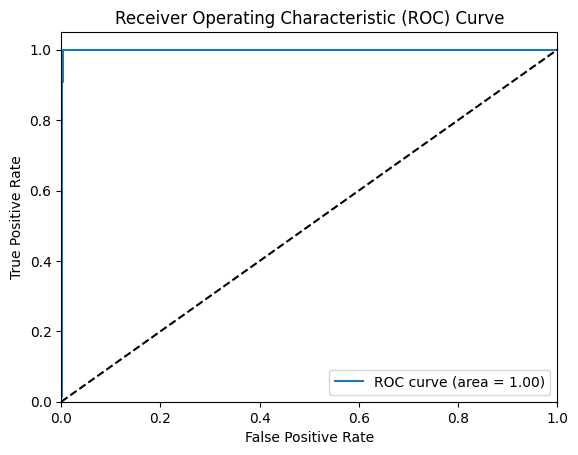

AUC Score: 0.9990011994504595


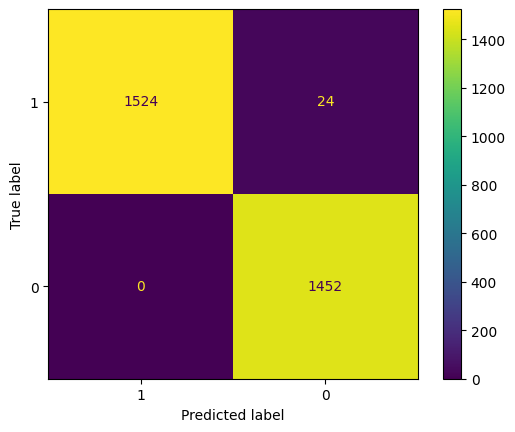

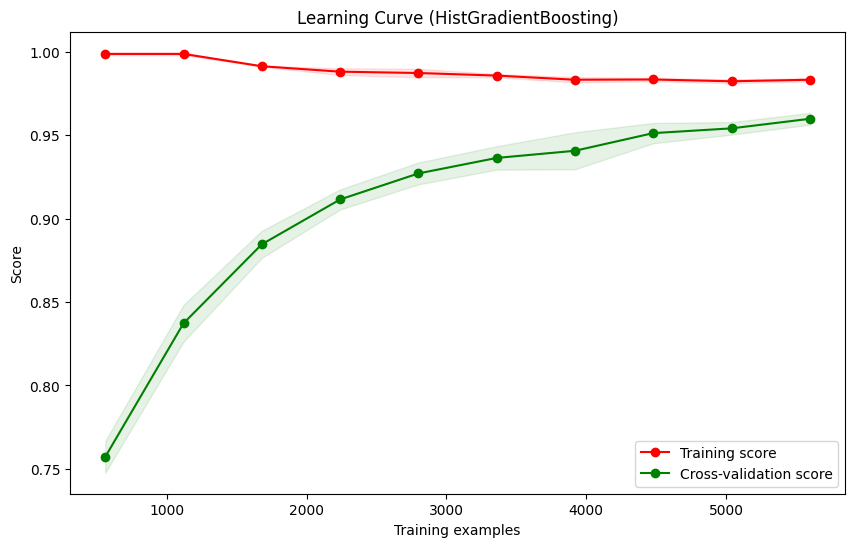

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.99, 0.99, 0.9971428571428571, 0.9914285714285714, 0.9885714285714285, 0.9871428571428571, 0.9857142857142858, 0.9828571428571429, 0.9871428571428571, 0.9928469241773963]
Mean accuracy: 0.9892846924177394
95% confidence interval: (0.9864252063108269, 0.992144178524652)


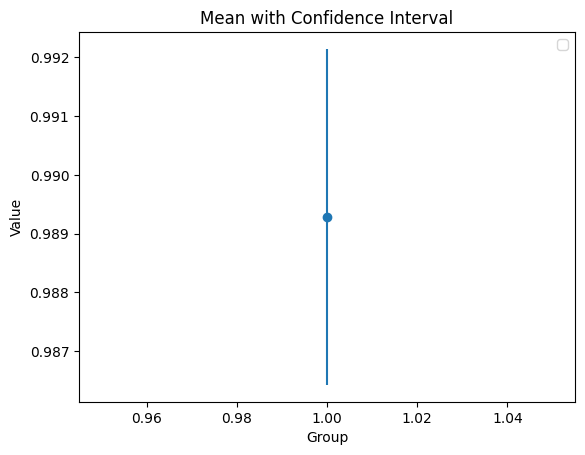

ADDING 10% TO FEATURE: age
--------------------------------------

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------


In [4]:
for column in df.columns:
    if column == 'stroke':
        break
    print(f'ADDING 10% TO FEATURE: {column}')
    print('--------------------------------------')
    indices, original_values = sanity_checks_methods.add_null_values(df,column, 10)
    
    print('\n DECISION TREE PREDICTIONS AND RESULTS')
    print('---------------------------------------------------')
    decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
    ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
    print('\n PRINT HGB PREDICTIONS AND RESULTS')
    print('---------------------------------------------------')
    hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
    ML_algorithms.k_fold_cross_validation_dt(hgb,df) 
    
    df.loc[indices, column] = original_values

Inserting 30% of null values in every feature separately

In [ ]:
for column in df.columns:
    print(f'ADDING 30% TO FEATURE: {column}')
    print('--------------------------------------')
    indices, original_values = sanity_checks_methods.add_null_values(df,column, 30)
    
    print('\n DECISION TREE PREDICTIONS AND RESULTS')
    print('---------------------------------------------------')
    decision_tree = ML_algorithms.train_decision_tree_model(df)
    ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
    print('\n PRINT HGB PREDICTIONS AND RESULTS')
    print('---------------------------------------------------')
    hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
    ML_algorithms.k_fold_cross_validation_dt(hgb,df) 
    
    df.loc[indices, column] = original_values

Inserting 50% of null values in every feature separately

In [ ]:
for column in df.columns:
    print(f'ADDING 50% TO FEATURE: {column}')
    print('--------------------------------------')
    indices, original_values = sanity_checks_methods.add_null_values(df,column, 50)
    
    print('\n DECISION TREE PREDICTIONS AND RESULTS')
    print('---------------------------------------------------')
    decision_tree = ML_algorithms.train_decision_tree_model(df)
    ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
    print('\n PRINT HGB PREDICTIONS AND RESULTS')
    print('---------------------------------------------------')
    hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
    ML_algorithms.k_fold_cross_validation_dt(hgb,df)    
    
    df.loc[indices, column] = original_values

Inserting 10% of null values in the two most important features together (bmi, avg_glucose_level)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'bmi', 'avg_glucose_level']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df,feature,10)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]
    

Inserting 30% of null values in the two most important feature (bmi, avg_glucose_level)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'bmi', 'avg_glucose_level']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df,feature,30)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 50% of null values in the two most important feature (bmi, avg_glucose_level)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'bmi', 'avg_glucose_level']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df,feature,50)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 10% of null values in the two less important features

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'sex', 'age']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 10)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 30% of null values in the two less important features

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'sex', 'age']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 30)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 50% null values in the two less important feature

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'sex', 'age']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 50)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 10% of null values in health related features (avg_glucose_level, bmi, hypertension, smoking_status, heart_disease, age)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'avg_glucose_level', 'age', 'bmi', 'hypertension', 'smoking_status', 'heart_disease']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 10)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 30% of null values in health related features (avg_glucose_level, bmi, hypertension, smoking_status, heart_disease, age)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'avg_glucose_level', 'age', 'bmi', 'hypertension', 'smoking_status', 'heart_disease']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 30)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

Inserting 50% of null values in health related features (avg_glucose_level, bmi, hypertension, smoking_status, heart_disease, age)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'avg_glucose_level', 'age', 'bmi', 'hypertension', 'smoking_status', 'heart_disease']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 50)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

inserting 10% of null values in NOT health related features (sex, residence_type, ever_married, work_type)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'sex', 'residence_type', 'ever_married', 'work_type']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 10)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

inserting 30% of null values in NOT health related features (sex, residence_type, ever_married, work_type)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'sex', 'residence_type', 'ever_married', 'work_type']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 30)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]

inserting 50% of null values in NOT health related features (sex, residence_type, ever_married, work_type)

In [ ]:
indices_dict = {}
original_values_dict = {}
features = [ 'sex', 'residence_type', 'ever_married', 'work_type']

for feature in features:
    indices, original_values = sanity_checks_methods.add_null_values(df, feature, 50)
    indices_dict[feature] = indices
    original_values_dict[feature] = original_values

sanity_checks_methods.print_null_duplicates_values(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')

decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

print('\n HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

for feature in features:
    df.loc[indices_dict[feature], feature] = original_values_dict[feature]